## Synthetic Bank

### Martín

In [102]:
import pandas as pd
from pandas.plotting import scatter_matrix

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm


In [103]:
df = pd.read_csv('../data/bank/bs140513_032310.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
step           594643 non-null int64
customer       594643 non-null object
age            594643 non-null object
gender         594643 non-null object
zipcodeOri     594643 non-null object
merchant       594643 non-null object
zipMerchant    594643 non-null object
category       594643 non-null object
amount         594643 non-null float64
fraud          594643 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [104]:
df.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [105]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [106]:
df.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

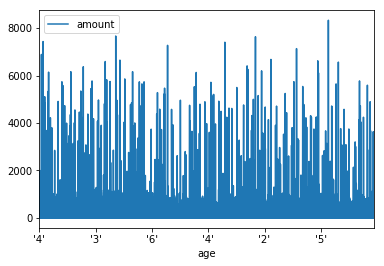

In [107]:
df.plot(x='age',y='amount',kind='line')

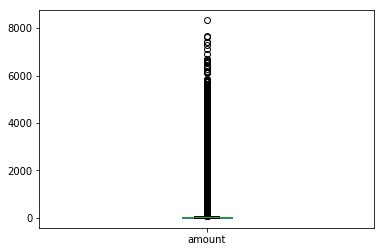

In [108]:
df.plot(x='age',y='amount',kind='box')

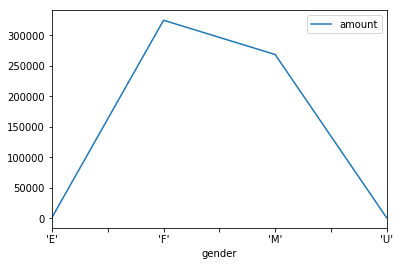

In [109]:
df_gender=df.groupby('gender').agg({'amount':'count'}).plot()

[]

In [68]:
df_gender.head(5)

AttributeError: 'AxesSubplot' object has no attribute 'head'

In [69]:
gend_num = {"'M'": 0, "'F'": 1, "'U'":2, "'E'":3}
df_gender = df.replace({'gender': gend_num})

df_gender.head()


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4',0,'28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2',0,'28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4',1,'28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3',0,'28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5',0,'28007','M348934600','28007','es_transportation',35.72,0


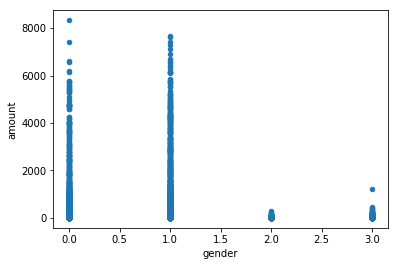

In [70]:
df_gender.plot(x='gender',y='amount',kind='scatter')

In [16]:
df['amount'].agg(['mean', 'std', 'max', 'min'])

mean      37.890135
std      111.402831
max     8329.960000
min        0.000000
Name: amount, dtype: float64

In [17]:
df_g_amount=df.loc[:,["gender","amount"]]

In [18]:
df_g_amount.head(20)

,gender,amount
0,'M',4.55
1,'M',39.68
2,'F',26.89
3,'M',17.25
4,'M',35.72
5,'F',25.81
6,'F',9.10
7,'F',21.17
8,'M',32.40
9,'F',35.40


In [85]:
df_sort_gender= df_g_amount.sort_values("gender")
df_sort_gender.head()

,gender,amount
302730,'E',15.76
232335,'E',56.49
320633,'E',17.87
240129,'E',22.93
519873,'E',17.73


In [20]:
df_sort_gender.agg({"amount":"mean"})

amount    37.890135
dtype: float64

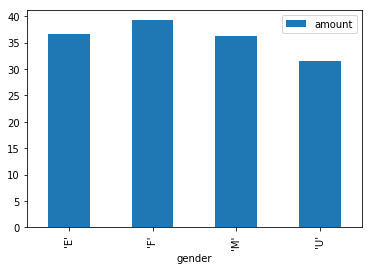

In [97]:
df_group_gender= df_g_amount.groupby("gender")
df_group_gender.agg({'amount':'mean'}).plot(kind='bar')

In [100]:
df_group_gender.agg({'amount':'mean'}).plot.pie()

ValueError: pie requires either y column or 'subplots=True'

In [22]:
df['gender'].describe()

count     594643
unique         4
top          'F'
freq      324565
Name: gender, dtype: object

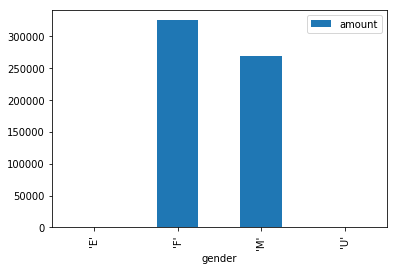

In [129]:
df_gender=df.groupby('gender').agg({'amount':'count'})   #with aggregate
df_gender.plot(kind='bar')

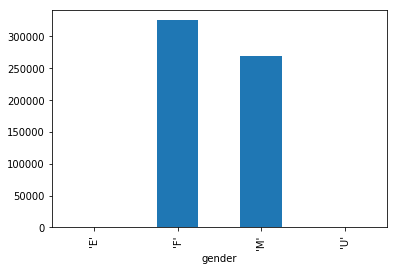

In [132]:
df.groupby('gender')['amount'].count().plot(kind='bar')   #without aggregate, like Mathia's code

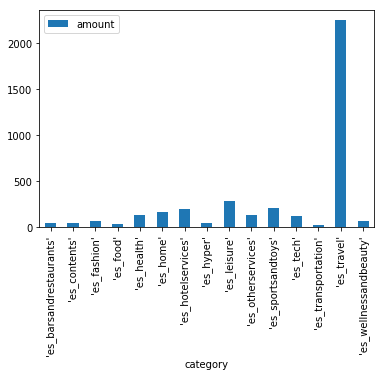

In [24]:
df_category=df.groupby('category').agg({'amount':'mean'})
df_category.plot(kind='bar')

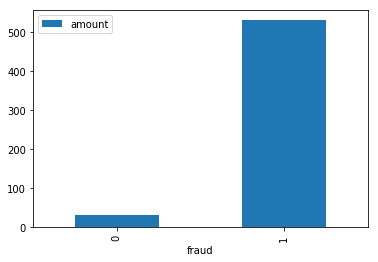

In [25]:
df_category=df.groupby('fraud').agg({'amount':'mean'})
df_category.plot(kind='bar')

In [26]:
df_category=df.groupby('category').agg({'fraud':'mean'})
df_category
#which categories have no fraud

,fraud
category,
'es_barsandrestaurants',0.018829
'es_contents',0.000000
'es_fashion',0.017973
'es_food',0.000000
'es_health',0.105126
'es_home',0.152064
'es_hotelservices',0.314220
'es_hyper',0.045917
'es_leisure',0.949900


In [27]:
#food, transport and contents have no fraud

In [28]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [29]:
df_nofraud= df.loc[df['category']!=("'es_transportation'")]
df_nofraud= df.loc[df['category']!=("'es_food'")]
df_nofraud= df.loc[df['category']!=("'es_contents'")]
df_nofraud.head()


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


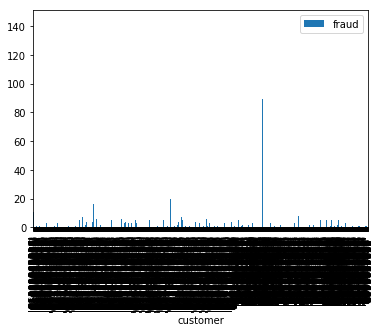

In [30]:
df_nofraud_customer= df.groupby('customer').agg({'fraud':'sum'}).plot(kind='bar')


In [31]:
df.groupby('customer').agg({'fraud':'sum'}).idxmax()

fraud    'C1350963410'
dtype: object

In [32]:
customer = df.loc[df['customer']=="'C1350963410'"]
customer.groupby('fraud').agg({'amount':'count'})

,amount
fraud,
0,47
1,144


In [33]:
# C1350963410 

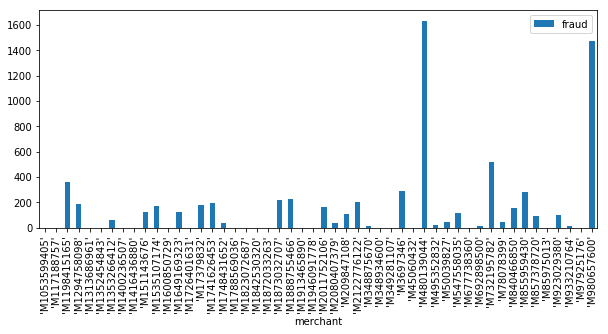

In [34]:
df_nofraud_customer= df.groupby('merchant').agg({'fraud':'sum'}).plot(kind='bar', figsize=(10,4))

In [35]:
df_gender=df.groupby('gender').agg({'amount':'count','fraud':'sum'})
df_gender.head()

,amount,fraud
gender,,
'E',1178,7
'F',324565,4758
'M',268385,2435
'U',515,0


In [36]:
4758/324565


0.014659621339331104

In [37]:
2435/268385

0.00907278722730406

In [38]:
df_gender['Prozent']= df_gender['fraud']/df_gender['amount']*100

In [39]:
df_gender.head()

,amount,fraud,Prozent
gender,,,
'E',1178,7,0.594228
'F',324565,4758,1.465962
'M',268385,2435,0.907279
'U',515,0,0.000000


In [40]:
#to add more filters in a single code
#'step' greater and smaller than x and then I reduce the list to the data in between
df_steps = df.loc[(df['step'] >10) & (df['step'] < 20)]
df_steps.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
27826,11,'C1280960686','2','M','28007','M348934600','28007','es_transportation',24.46,0
27827,11,'C1922022324','2','F','28007','M348934600','28007','es_transportation',49.26,0
27828,11,'C1196357413','3','F','28007','M1823072687','28007','es_transportation',30.57,0
27829,11,'C1230747575','3','M','28007','M348934600','28007','es_transportation',44.35,0
27830,11,'C1944646841','1','F','28007','M1823072687','28007','es_transportation',24.74,0


In [41]:
filtered = df[[]]


In [42]:
import numpy as np
np.random.randn(7, 4)

array([[ 2.01959952, -1.31486402, -1.09700642, -1.34670121],
       [ 0.41998621, -1.32391796, -0.34235087, -0.39953236],
       [ 0.4307647 , -0.44623362,  0.19510609,  0.47786835],
       [-1.02368207,  0.69919992,  0.24329743, -0.58457577],
       [ 0.71170287,  0.79228981,  0.52114066, -0.27665093],
       [ 0.27522137, -1.20842814,  1.28609131,  0.7703526 ],
       [-2.28273995, -0.1264811 ,  0.68468889,  1.16174422]])

In [43]:
number_of_rows = 10
dates = pd.date_range('20130101', periods=number_of_rows)
df = pd.DataFrame(np.random.randn(number_of_rows, 4), index=dates, columns=list('ABCD'))

In [44]:
df

,A,B,C,D
2013-01-01,-1.009190,-2.137140,-0.318273,-0.342435
2013-01-02,0.621693,-0.333265,-1.124301,-0.379583
2013-01-03,0.169392,-0.004328,0.128990,-0.744860
2013-01-04,-0.864450,0.527405,1.849847,-1.126083
2013-01-05,-0.358043,0.599988,-1.005008,0.097057
2013-01-06,1.399534,-0.993315,0.634877,-0.976917
2013-01-07,-0.742319,-0.890970,0.010407,-0.026807
2013-01-08,0.319788,1.074363,-0.147523,-0.486614
2013-01-09,-0.564881,-0.231704,-0.679123,-0.896012
2013-01-10,-1.600524,0.749278,-0.151044,2.319396


In [45]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

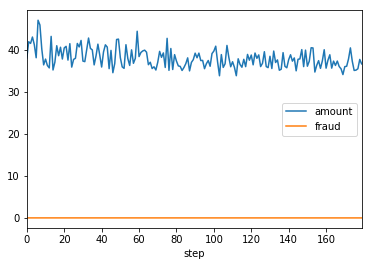

In [71]:
df.groupby('step').mean().plot()

In [76]:
df.groupby('step')['fraud'].mean().head()

step
0    0.016461
1    0.016502
2    0.016247
3    0.016006
4    0.015798
Name: fraud, dtype: float64

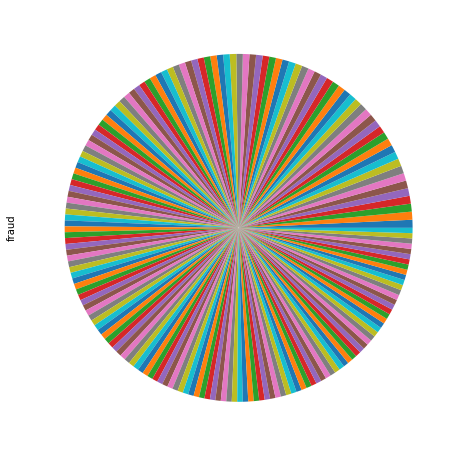

In [84]:
df.groupby('step')['fraud'].mean().plot.pie(figsize=(8,8), labels=None)

In [115]:
df.groupby('gender')['fraud'].mean().head()

gender
'E'    0.005942
'F'    0.014660
'M'    0.009073
'U'    0.000000
Name: fraud, dtype: float64

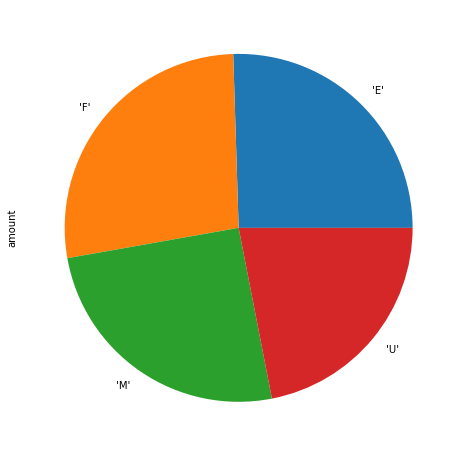

In [122]:
labels = 'Äh?', 'Female', 'Male', 'Unoknown'

df.groupby('gender')['amount'].mean().plot.pie(figsize=(8,8))

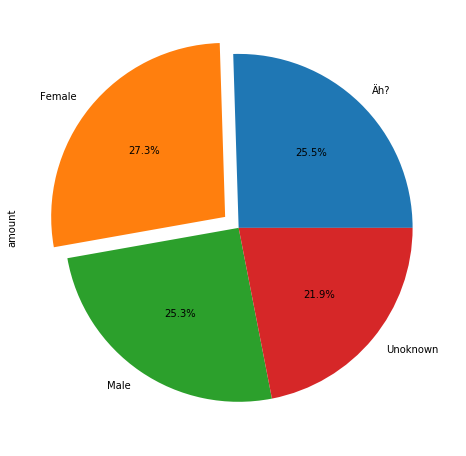

In [128]:
labels = 'Äh?', 'Female', 'Male', 'Unoknown'
explode = (0, 0.1, 0, 0)
sizes = [0, 36, 0, 0]
df.groupby('gender')['amount'].mean().plot.pie(figsize=(8,8), labels=labels, explode=explode,autopct='%1.1f%%')

In [ ]:
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
#sizes = [15, 30, 45, 10]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

#fig1, ax1 = plt.subplots()
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
 #       shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()